<a href="https://colab.research.google.com/github/Ssylla3/DATA-110/blob/main/Seynabou_sylla_week5_data110_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preview dataset
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The Titanic dataset contains information on 891 passengers aboard the Titanic, providing details such as survival status (survived), passenger class (pclass), gender (sex), age, number of siblings/spouses aboard (sibsp), number of parents/children aboard (parch), fare paid, embarkation port (embark_town), and other demographic information (class, deck, embarked, alive, alone). This dataset helps investigate the factors influencing passenger survival during the tragic sinking in 1912, particularly highlighting the socioeconomic status, age, and gender of passengers.

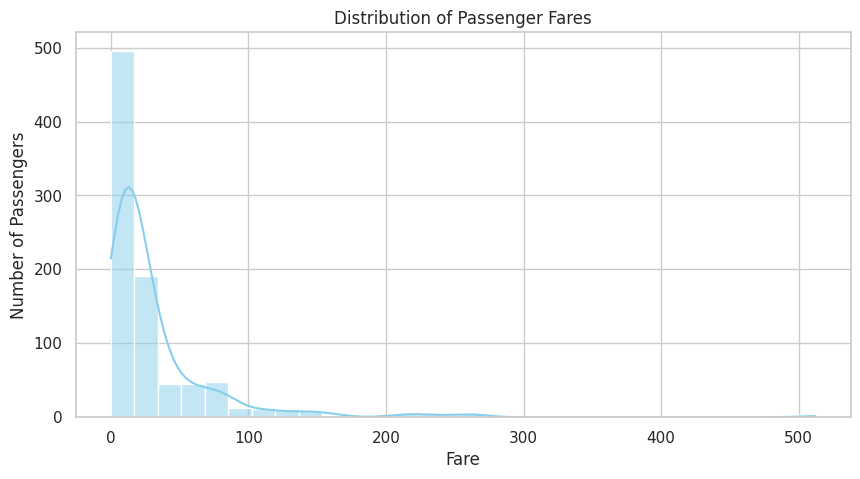

In [2]:
# Task 2: Fare Distribution
# Histogram & KDE for Fare
plt.figure(figsize=(10,5))
sns.histplot(titanic['fare'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()


The fare distribution is heavily skewed right, showing that most passengers paid lower fares, with a small group paying significantly higher fares. These outliers represent first-class passengers. High fare potentially correlates with better cabin location, possibly influencing survival probability.

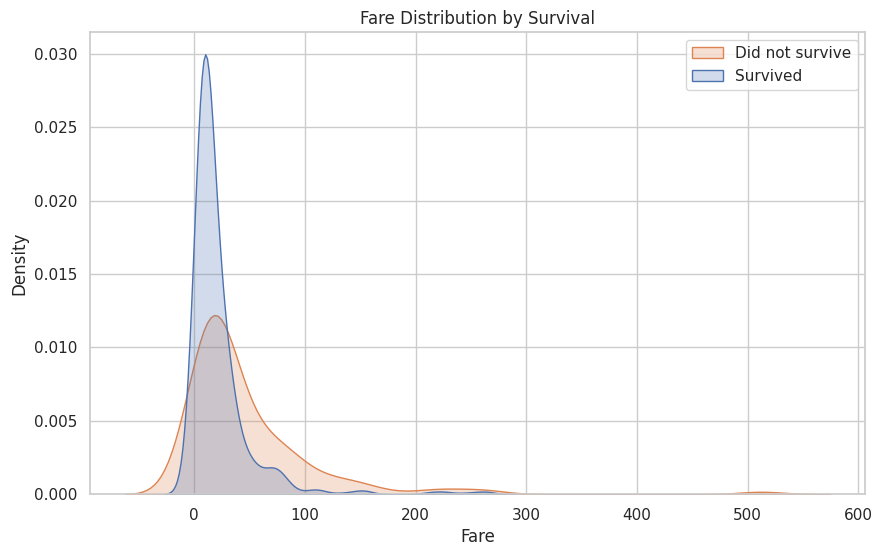

In [3]:
# Task 3: Fare and Survival Rates
plt.figure(figsize=(10,6))
sns.kdeplot(data=titanic, x='fare', hue='survived', fill=True, common_norm=False)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(labels=['Did not survive', 'Survived'])
plt.show()


The KDE plot clearly demonstrates survivors typically paid higher fares. Those who didn't survive predominantly paid lower fares, suggesting socioeconomic status (ability to pay higher fares) significantly impacted survival, possibly due to priority in lifeboat access and proximity to lifeboats.

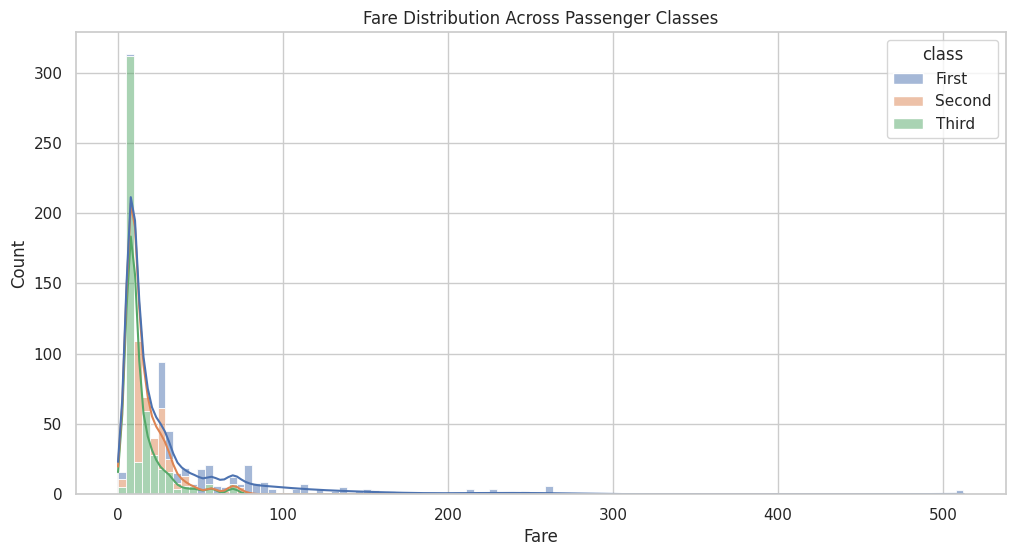

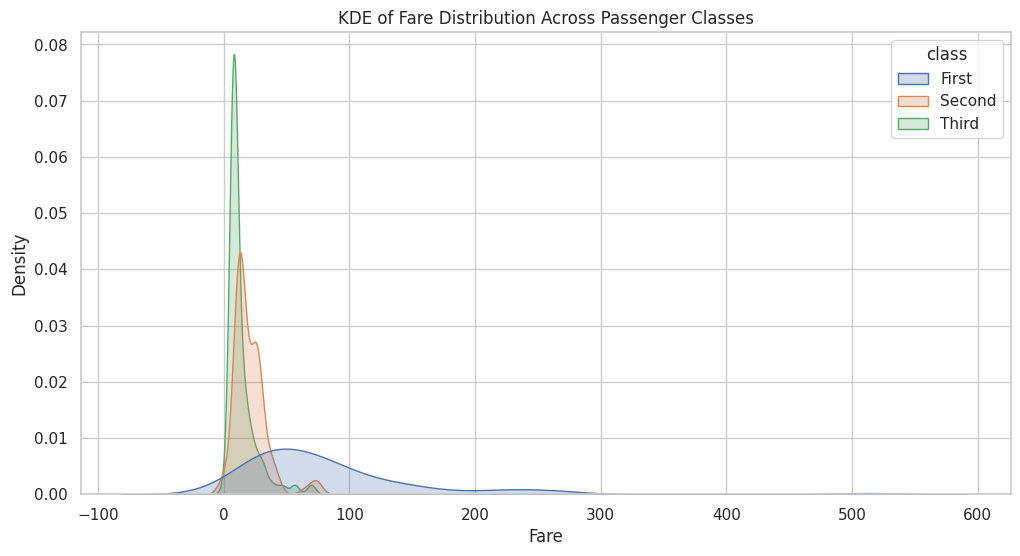

In [4]:
# Task 4: Passenger Class, Fare, and Survival
# KDE plots for fare by passenger class and survival
plt.figure(figsize=(12,6))
sns.histplot(data=titanic, x='fare', hue='class', multiple='stack', kde=True)
plt.title('Fare Distribution Across Passenger Classes')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.kdeplot(data=titanic, x='fare', hue='class', fill=True, common_norm=False)
plt.title('KDE of Fare Distribution Across Passenger Classes')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


Fare distribution aligns clearly with passenger class: First-class passengers paid substantially more, while third-class passengers paid the least. Survival rates are highest in first class, moderate in second class, and lowest in third class. These patterns reflect the stark socioeconomic divisions aboard the Titanic, where wealth directly translated to better survival odds.

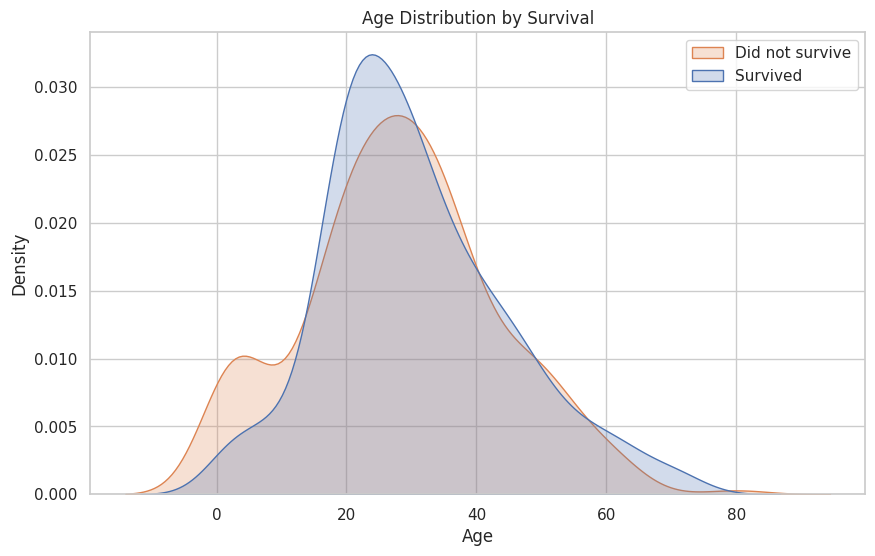

In [5]:
# Task 5: Age of Survivors and Non-Survivors
# Age distribution by survival
plt.figure(figsize=(10,6))
sns.kdeplot(data=titanic, x='age', hue='survived', fill=True, common_norm=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Did not survive', 'Survived'])
plt.show()


Younger passengers (children) had higher survival densities, indicating prioritized rescue. Passengers in their late teens to early thirties had higher mortality, possibly due to limited lifeboat space prioritized for children and women.

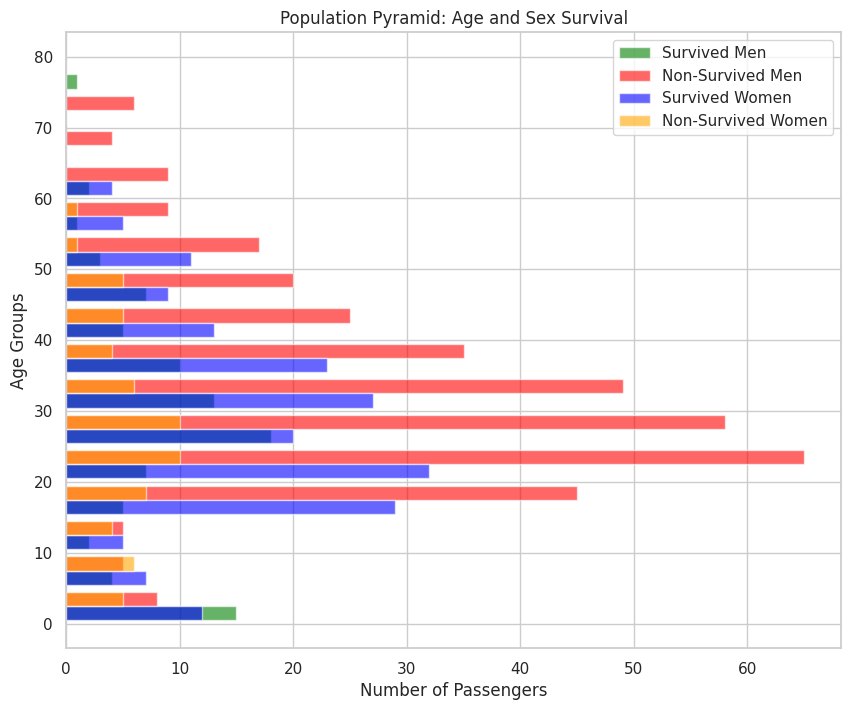

In [6]:
# Pyramid Histogram (Age and Sex Survival)
# Pyramid-style histogram for age by sex and survival
import numpy as np

plt.figure(figsize=(10,8))
male = titanic[titanic['sex']=='male']
female = titanic[titanic['sex']=='female']

plt.hist([male[male['survived']==1]['age'], male[male['survived']==0]['age']],
         bins=np.arange(0,81,5), orientation='horizontal',
         color=['green','red'], alpha=0.6, label=['Survived Men','Non-Survived Men'])

plt.hist([female[female['survived']==1]['age'], female[female['survived']==0]['age']],
         bins=np.arange(0,81,5), orientation='horizontal',
         color=['blue','orange'], alpha=0.6, label=['Survived Women','Non-Survived Women'])

plt.xlabel('Number of Passengers')
plt.ylabel('Age Groups')
plt.title('Population Pyramid: Age and Sex Survival')
plt.legend()
plt.show()


Women and younger passengers (children) had notably higher survival rates, reflecting historical "women and children first" policies during evacuation. Men, especially in prime adult ages (20-40), had significantly lower survival rates.

<ipython-input-9-2c641f20f45a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic, ci=None, palette='pastel')
<ipython-input-9-2c641f20f45a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic, ci=None, palette='pastel')


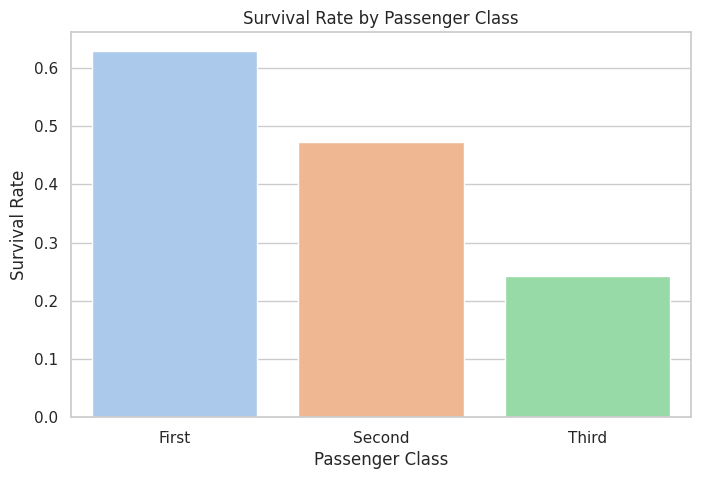

In [9]:
# Optional Task 7 (Additional Visualizations)
plt.figure(figsize=(8,5))
sns.barplot(x='class', y='survived', data=titanic, ci=None, palette='pastel')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


Bar graphs highlight clearly that socioeconomic class significantly impacted survival rates. First-class passengers had the highest survival rates, emphasizing social inequalities in lifeboat access.